# Player Analysis

In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

## Data Cleaning and Exploration

In [511]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [512]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [513]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [514]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["batting_team"]=matches["batting_team"].replace(dicti)
matches["bowling_team"]=matches["bowling_team"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

In [515]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


## Taking in consideration only RCB VS DC matches

In [516]:
RCB_DC = matches[np.logical_or(np.logical_and(matches['team1']=='Royal Challengers Bangalore',matches['team2']=='Delhi Capitals'),
                            np.logical_and(matches['team2']=='Royal Challengers Bangalore',matches['team1']=='Delhi Capitals'))]

RCB_DC = RCB_DC[(RCB_DC["season"]==2014)|(RCB_DC["season"]==2015)|(RCB_DC["season"]==2016)|(RCB_DC["season"]==2017)|(RCB_DC["season"]==2018)|(RCB_DC["season"]==2019)]

In [517]:
RCB_DC.match_id.nunique()

12

In [518]:
RCB_DC.season.unique()

array([2017, 2014, 2015, 2016, 2018, 2019], dtype=int64)

## Batsman to have strike rate greater then 130

- Royal Challengers Bangalore

In [519]:
rcb = RCB_DC[(RCB_DC["batting_team"]=="Royal Challengers Bangalore")]

rcb = rcb[rcb["wide_runs"]==0]

rcb.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
1003,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,7,...,0,0,0,0,0,1,0,1,NaN,NaN
1004,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,8,...,0,0,0,0,0,0,0,0,NaN,NaN
1005,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,8,...,0,0,0,0,0,1,0,1,NaN,NaN
1006,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,8,...,0,0,0,0,0,1,0,1,NaN,NaN
1007,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,8,...,0,0,0,0,0,6,0,6,NaN,NaN


- Strike rate

In [520]:
strike = rcb.groupby(["match_id","batsman"]).agg({ "batsman_runs":"sum","ball" : 'count'})

print("Runs scored by RCB batsman against DC bowler :")

strike

Runs scored by RCB batsman against DC bowler :


batsman_runs  ball
match_id batsman                              
5        CH Gayle                      6     8
         Iqbal Abdulla                 5     7
         KM Jadhav                    69    37
         Mandeep Singh                12    10
         P Negi                       10     8
...                                  ...   ...
11337    MP Stoinis                   32    24
         PA Patel                     40    20
         S Dube                       24    16
         V Kohli                      24    17
         Washington Sundar             1     2

[75 rows x 2 columns]

In [521]:
strike["strike rate"] = (strike['batsman_runs']/strike["ball"]) * 100

print("Strike Rate of RCB Batsman against DC :")

strike

Strike Rate of RCB Batsman against DC :


batsman_runs  ball  strike rate
match_id batsman                                           
5        CH Gayle                      6     8    75.000000
         Iqbal Abdulla                 5     7    71.428571
         KM Jadhav                    69    37   186.486486
         Mandeep Singh                12    10   120.000000
         P Negi                       10     8   125.000000
...                                  ...   ...          ...
11337    MP Stoinis                   32    24   133.333333
         PA Patel                     40    20   200.000000
         S Dube                       24    16   150.000000
         V Kohli                      24    17   141.176471
         Washington Sundar             1     2    50.000000

[75 rows x 3 columns]

- Boundaries

In [522]:
rcb_boundary = rcb[(rcb["batsman_runs"]==4)|(rcb["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(rcb_boundary.groupby(["match_id","batsman"])["batsman_runs"].count())

boundary = boundary_runs.iloc[:,-1]

In [523]:
strike["boundary"] = boundary

strike.boundary.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary
match_id batsman                                                     
7938     SN Khan                      11     8   137.500000       2.0
         V Kohli                      70    40   175.000000      10.0
11311    AB de Villiers               17    16   106.250000       2.0
         AD Nath                      19    12   158.333333       4.0
         M Ali                        32    18   177.777778       4.0
         MP Stoinis                   15    17    88.235294       1.0
         Mohammed Siraj                2     5    40.000000       0.0
         P Negi                        0     1     0.000000       0.0
         PA Patel                      9    10    90.000000       1.0
         TG Southee                    9     9   100.000000       0.0
         V Kohli                      42    33   127.272727       3.0
         YS Chahal                     1     1   100.000000       0.0
11337    AB de Villiers               17    19    89.473684       1.0
         Gurkeerat Singh              28    19   147.368421       3.0
         H Klaasen                     3     3   100.000000       0.0
         MP Stoinis                   32    24   133.333333       3.0
         PA Patel                     40    20   200.000000       8.0
         S Dube                       24    16   150.000000       2.0
         V Kohli                      24    17   141.176471       3.0
         Washington Sundar             1     2    50.000000       0.0

- Fours

In [524]:
col = rcb[["match_id","batsman","batsman_runs"]]

four = col["batsman_runs"]==4
six = col["batsman_runs"]==6

four = four.replace({False:0 , True: 1})
six = six.replace({False:0 , True: 1})

four = list(four)
six = list(six)

In [525]:
col["is_four"] = four
col["is_six"] = six

col

,match_id,batsman,batsman_runs,is_four,is_six
960,5,CH Gayle,1,0,0
961,5,SR Watson,4,1,0
962,5,SR Watson,0,0,0
963,5,SR Watson,4,1,0
964,5,SR Watson,0,0,0
...,...,...,...,...,...
175903,11337,Washington Sundar,0,0,0
175904,11337,MP Stoinis,0,0,0
175905,11337,MP Stoinis,6,0,1
175906,11337,MP Stoinis,0,0,0


In [526]:
col12 = pd.DataFrame(col.groupby(["match_id","batsman"]).agg({"is_four":"sum","is_six":"sum"}))

col12

is_four  is_six
match_id batsman                           
5        CH Gayle                 1       0
         Iqbal Abdulla            0       0
         KM Jadhav                5       5
         Mandeep Singh            3       0
         P Negi                   0       1
...                             ...     ...
11337    MP Stoinis               1       2
         PA Patel                 7       1
         S Dube                   0       2
         V Kohli                  2       1
         Washington Sundar        0       0

[75 rows x 2 columns]

In [527]:
four = col12["is_four"]

In [528]:
strike["fours"] = four

strike.fours.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary  fours
match_id batsman                                                            
7938     SN Khan                      11     8   137.500000       2.0      2
         V Kohli                      70    40   175.000000      10.0      7
11311    AB de Villiers               17    16   106.250000       2.0      1
         AD Nath                      19    12   158.333333       4.0      4
         M Ali                        32    18   177.777778       4.0      1
         MP Stoinis                   15    17    88.235294       1.0      0
         Mohammed Siraj                2     5    40.000000       0.0      0
         P Negi                        0     1     0.000000       0.0      0
         PA Patel                      9    10    90.000000       1.0      1
         TG Southee                    9     9   100.000000       0.0      0
         V Kohli                      42    33   127.272727       3.0      1
         YS Chahal                     1     1   100.000000       0.0      0
11337    AB de Villiers               17    19    89.473684       1.0      0
         Gurkeerat Singh              28    19   147.368421       3.0      2
         H Klaasen                     3     3   100.000000       0.0      0
         MP Stoinis                   32    24   133.333333       3.0      1
         PA Patel                     40    20   200.000000       8.0      7
         S Dube                       24    16   150.000000       2.0      0
         V Kohli                      24    17   141.176471       3.0      2
         Washington Sundar             1     2    50.000000       0.0      0

- Final

In [529]:
strike = strike[(strike["ball"]>10)&(strike["strike rate"]>130)&(strike["boundary"]>3)&(strike["fours"]>=2)]

strike.reset_index(inplace = True)

print("RCB batsman with strike rate greater then 130 : ")

strike

RCB batsman with strike rate greater then 130 : 


,match_id,batsman,batsman_runs,ball,strike rate,boundary,fours
0,5,KM Jadhav,69,37,186.486486,10.0,5
1,459,PA Patel,37,28,132.142857,6.0,5
2,459,Yuvraj Singh,52,29,179.310345,8.0,3
3,495,AB de Villiers,33,17,194.117647,5.0,4
4,543,CH Gayle,62,40,155.000000,10.0,6
5,543,V Kohli,35,23,152.173913,6.0,6
6,587,AB de Villiers,55,33,166.666667,10.0,9
7,587,SR Watson,33,19,173.684211,5.0,2
8,587,V Kohli,79,48,164.583333,10.0,7
9,632,KL Rahul,38,23,165.217391,5.0,4


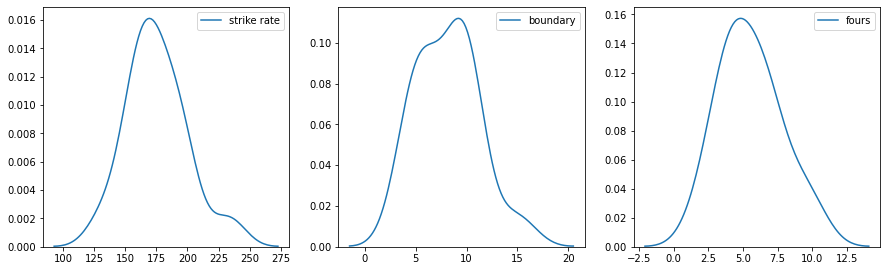

In [530]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.kdeplot(strike["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(strike["fours"])

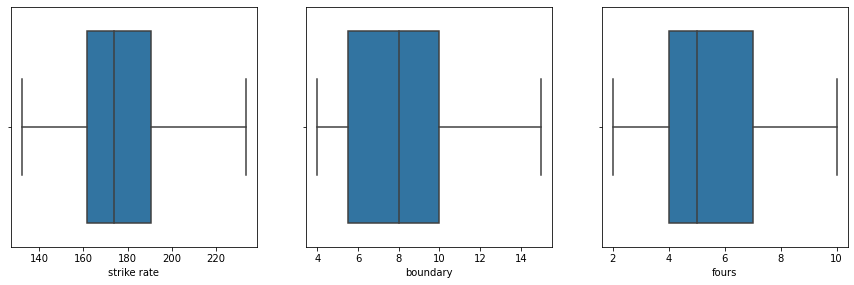

In [531]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.boxplot(strike["boundary"])
plt.subplot(3,3,3)
sns.boxplot(strike["fours"])

Text(0, 0.5, 'Count')

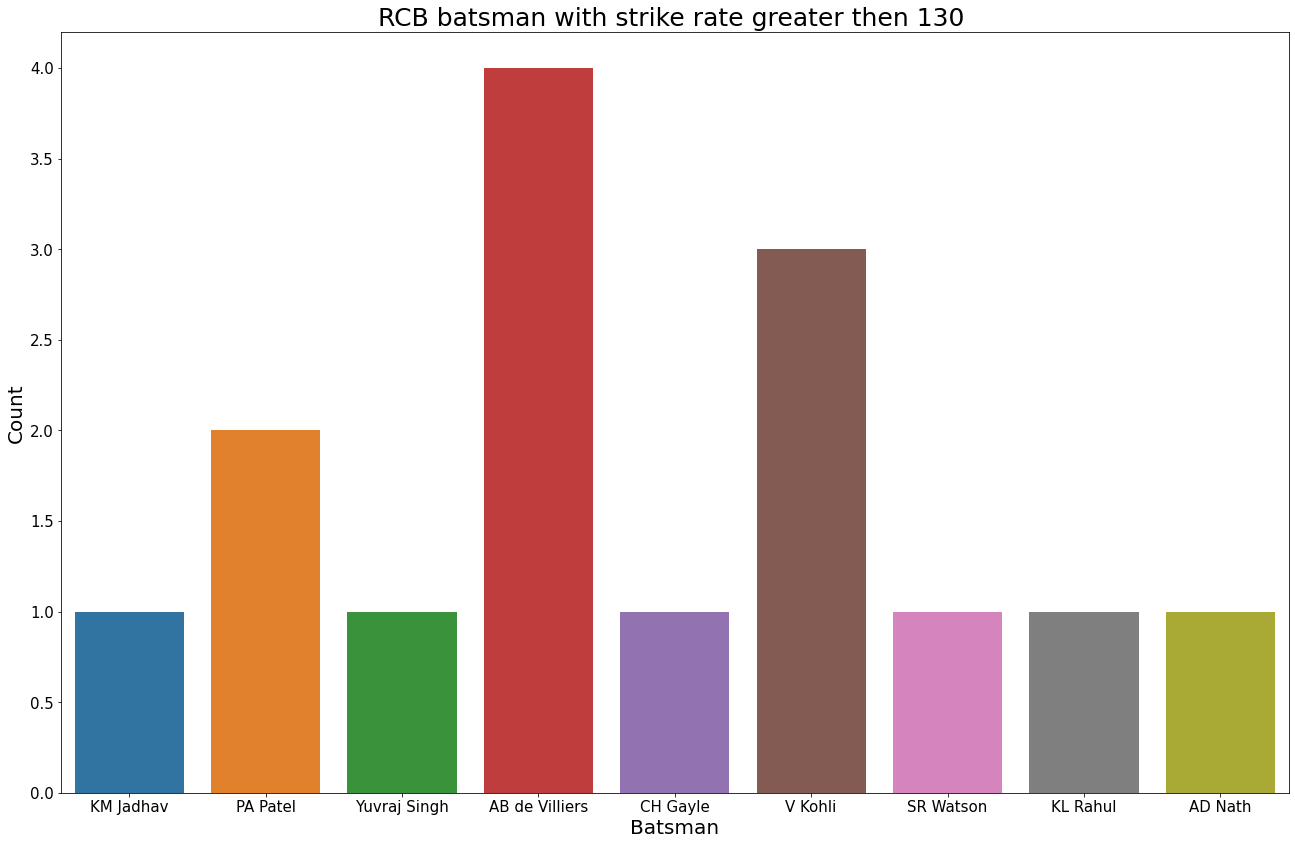

In [532]:
plt.figure(figsize = (22,14))
sns.countplot(strike["batsman"])
plt.title("RCB batsman with strike rate greater then 130 ",fontsize = 25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

- Delhi Capitals

In [533]:
dc = RCB_DC[(RCB_DC["batting_team"]=="Delhi Capitals")]

dc = dc[(dc["wide_runs"]==0)]

dc.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
1126,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,7,...,0,0,0,0,0,1,0,1,NaN,NaN
1127,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,8,...,0,0,0,0,0,1,0,1,NaN,NaN
1128,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,8,...,0,0,0,0,0,1,0,1,NaN,NaN
1129,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,8,...,0,0,0,0,0,0,0,0,SW Billings,caught
1130,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,8,...,0,0,0,0,0,1,0,1,NaN,NaN


- Strike Rate

In [534]:
strike = dc.groupby(["match_id","batsman"]).agg({ "batsman_runs":"sum","ball" : 'count'})

print("Runs scored by DC batsman against RCB bowler :")

strike

Runs scored by DC batsman against RCB bowler :


batsman_runs  ball
match_id batsman                          
5        A Mishra                  8    14
         AP Tare                  18    17
         CH Morris                 4     5
         CR Brathwaite             1     5
         KK Nair                   4     3
...                              ...   ...
11337    P Shaw                   18    10
         RR Pant                   7     7
         S Dhawan                 52    38
         S Rutherford             32    13
         SS Iyer                  52    37

[96 rows x 2 columns]

In [535]:
strike["strike rate"] = (strike['batsman_runs']/strike["ball"]) * 100

print("Strike Rate of DC Batsman against RCB :")

strike

Strike Rate of DC Batsman against RCB :


batsman_runs  ball  strike rate
match_id batsman                                       
5        A Mishra                  8    14    57.142857
         AP Tare                  18    17   105.882353
         CH Morris                 4     5    80.000000
         CR Brathwaite             1     5    20.000000
         KK Nair                   4     3   133.333333
...                              ...   ...          ...
11337    P Shaw                   18    10   180.000000
         RR Pant                   7     7   100.000000
         S Dhawan                 52    38   136.842105
         S Rutherford             32    13   246.153846
         SS Iyer                  52    37   140.540541

[96 rows x 3 columns]

- Boundaries

In [536]:
dc_boundary = dc[(dc["batsman_runs"]==4)|(dc["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(dc_boundary.groupby(["match_id","batsman"])["batsman_runs"].count())

boundary = boundary_runs.iloc[:,-1]

In [537]:
strike["boundary"] = boundary

strike.boundary.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary
match_id batsman                                                
7938     JJ Roy                  12     9   133.333333       2.0
         P Shaw                   2     4    50.000000       0.0
         RR Pant                 61    34   179.411765       9.0
         SS Iyer                 33    35    94.285714       3.0
         V Shankar               22    20   110.000000       2.0
11311    AR Patel                 4     1   400.000000       1.0
         C Ingram                22    21   104.761905       3.0
         CH Morris                0     3     0.000000       0.0
         P Shaw                  33    22   150.000000       6.0
         R Tewatia                1     2    50.000000       0.0
         RR Pant                 18    14   128.571429       2.0
         S Dhawan                 0     1     0.000000       0.0
         SS Iyer                 68    50   136.000000      10.0
11337    AR Patel                16     9   177.777778       3.0
         C Ingram                11     7   157.142857       2.0
         P Shaw                  18    10   180.000000       4.0
         RR Pant                  7     7   100.000000       1.0
         S Dhawan                52    38   136.842105       7.0
         S Rutherford            32    13   246.153846       5.0
         SS Iyer                 52    37   140.540541       5.0

- Fours

In [538]:
col = dc[["match_id","batsman","batsman_runs"]]

four = col["batsman_runs"]==4
six = col["batsman_runs"]==6

four = four.replace({False:0 , True: 1})
six = six.replace({False:0 , True: 1})

four = list(four)
six = list(six)

In [539]:
col["is_four"] = four
col["is_six"] = six

col

,match_id,batsman,batsman_runs,is_four,is_six
1084,5,AP Tare,0,0,0
1086,5,AP Tare,0,0,0
1087,5,AP Tare,1,0,0
1088,5,SW Billings,0,0,0
1089,5,SW Billings,4,1,0
...,...,...,...,...,...
175781,11337,S Rutherford,4,1,0
175782,11337,S Rutherford,1,0,0
175783,11337,AR Patel,4,1,0
175784,11337,AR Patel,1,0,0


In [540]:
col12 = pd.DataFrame(col.groupby(["match_id","batsman"]).agg({"is_four":"sum","is_six":"sum"}))

col12

is_four  is_six
match_id batsman                       
5        A Mishra             0       0
         AP Tare              3       0
         CH Morris            0       0
         CR Brathwaite        0       0
         KK Nair              1       0
...                         ...     ...
11337    P Shaw               4       0
         RR Pant              1       0
         S Dhawan             5       2
         S Rutherford         2       3
         SS Iyer              2       3

[96 rows x 2 columns]

In [541]:
four = col12["is_four"]

In [542]:
strike["fours"] = four

strike.fours.fillna(0,inplace=True)

strike.tail(20)

batsman_runs  ball  strike rate  boundary  fours
match_id batsman                                                       
7938     JJ Roy                  12     9   133.333333       2.0      1
         P Shaw                   2     4    50.000000       0.0      0
         RR Pant                 61    34   179.411765       9.0      5
         SS Iyer                 33    35    94.285714       3.0      3
         V Shankar               22    20   110.000000       2.0      2
11311    AR Patel                 4     1   400.000000       1.0      1
         C Ingram                22    21   104.761905       3.0      2
         CH Morris                0     3     0.000000       0.0      0
         P Shaw                  33    22   150.000000       6.0      6
         R Tewatia                1     2    50.000000       0.0      0
         RR Pant                 18    14   128.571429       2.0      2
         S Dhawan                 0     1     0.000000       0.0      0
         SS Iyer                 68    50   136.000000      10.0      8
11337    AR Patel                16     9   177.777778       3.0      3
         C Ingram                11     7   157.142857       2.0      1
         P Shaw                  18    10   180.000000       4.0      4
         RR Pant                  7     7   100.000000       1.0      1
         S Dhawan                52    38   136.842105       7.0      5
         S Rutherford            32    13   246.153846       5.0      2
         SS Iyer                 52    37   140.540541       5.0      2

- Final

In [543]:
strike = strike[(strike["ball"]>10)&(strike["strike rate"]>130)&(strike["boundary"]>3)&(strike["fours"]>=2)]

strike.reset_index(inplace = True)

print("DC batsman with strike rate greater then 130 : ")

strike

DC batsman with strike rate greater then 130 : 


,match_id,batsman,batsman_runs,ball,strike rate,boundary,fours
0,5,RR Pant,57,36,158.333333,7.0,3
1,55,RR Pant,45,34,132.352941,5.0,3
2,459,JP Duminy,67,48,139.583333,7.0,4
3,495,JP Duminy,48,30,160.000000,6.0,3
4,495,KM Jadhav,37,20,185.000000,5.0,3
5,571,JP Duminy,67,43,155.813953,7.0,4
6,571,Q de Kock,69,39,176.923077,12.0,9
7,587,Q de Kock,108,51,211.764706,18.0,15
8,7912,RR Pant,90,48,187.500000,14.0,7
9,7912,SS Iyer,52,31,167.741935,7.0,4


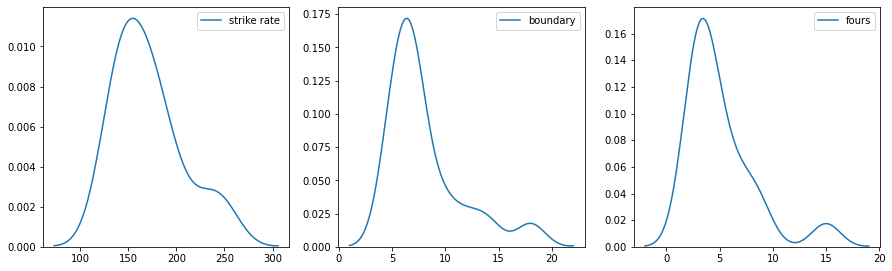

In [544]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.kdeplot(strike["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(strike["fours"])

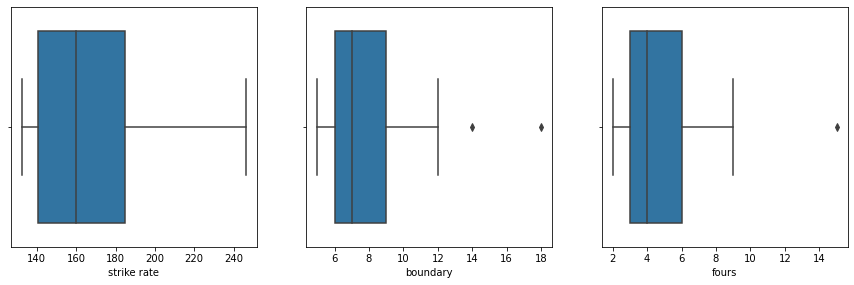

In [545]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(strike["strike rate"])
plt.subplot(3,3,2)
sns.boxplot(strike["boundary"])
plt.subplot(3,3,3)
sns.boxplot(strike["fours"])

Text(0, 0.5, 'Count')

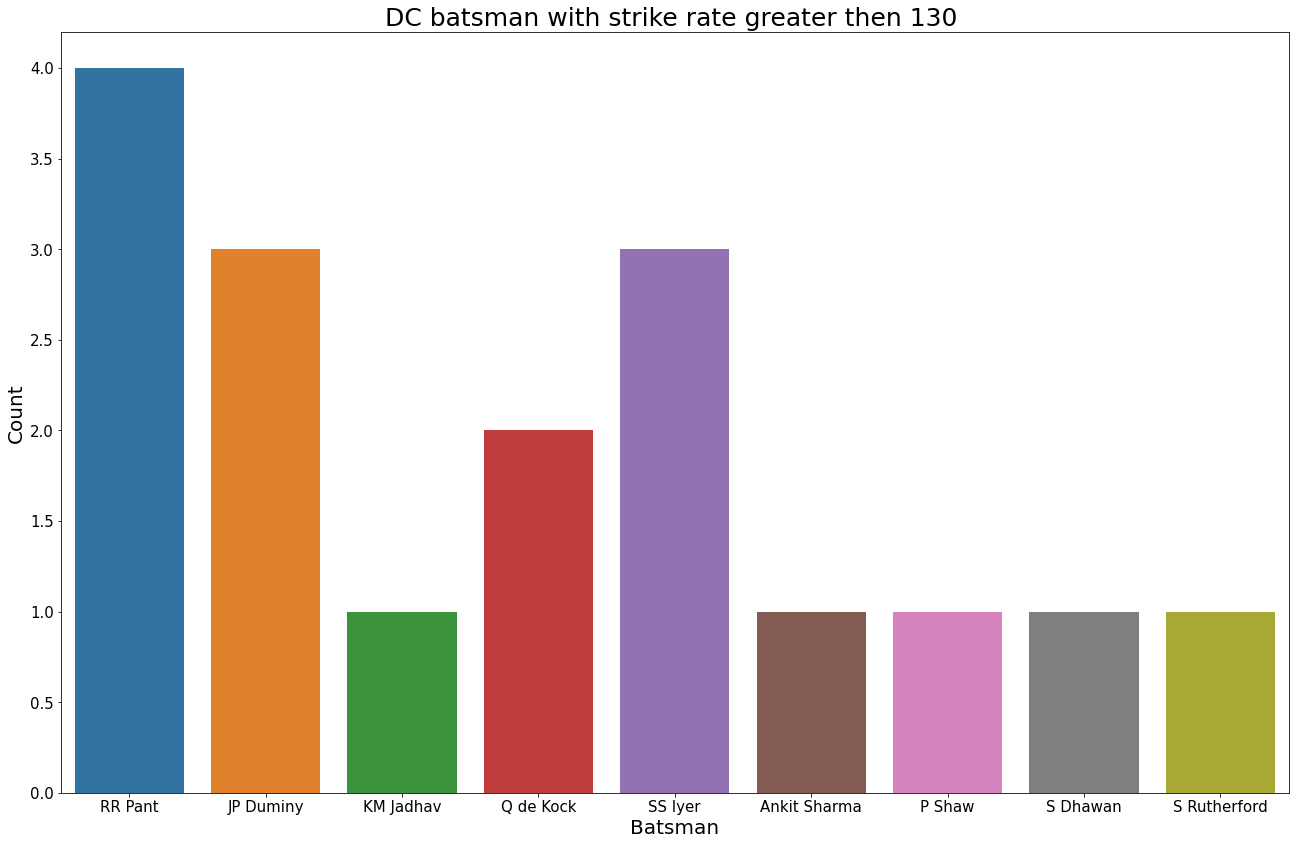

In [546]:
plt.figure(figsize = (22,14))
sns.countplot(strike["batsman"])
plt.title("DC batsman with strike rate greater then 130 ",fontsize = 25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

From all the above analysis of both the team's batsman we can predict that 3+ batsman overall are expected to have strike rate greater then 130 with boundaries more then 3 and fours atleast equal to 2.

## Balls Rabada will take for his 1st wicket

In [547]:
rabada = matches[matches["bowler"]=="K Rabada"]
rabada = rabada[(rabada["wide_runs"]==0)&(rabada["noball_runs"]==0)]
rabada = rabada[rabada["dismissal_kind"]!="run out"]

In [548]:
rabada_dismissal = rabada.groupby(["match_id"]).agg({"ball":"count","player_dismissed":"count"})

rabada_dismissal.columns = ["total ball","wicket taken"]

rabada_dismissal = rabada_dismissal[rabada_dismissal["wicket taken"]>0]

print("Rabada's Performance :")
rabada_dismissal

Rabada's Performance :


,total ball,wicket taken
match_id,,
24,23,1
31,20,2
41,23,2
44,24,1
11139,24,2
11141,22,1
11146,28,1
11149,23,2
11152,21,1


In [549]:
batsman = rabada.batsman.unique()
ball =[]
f = []
for value in rabada.groupby("match_id"):
    count = 0
    d = list(value[1]["player_dismissed"])
    f = list(value[1]["match_id"].unique())
    for i in d:
        count = count+1
        if(i in batsman):
            ball.append(count)
            break
ball

[12, 2, 1, 15, 14, 19, 11, 15, 12, 6, 10, 14, 13, 5, 20, 11]

In [550]:
rabada_dismissal["balls for 1st wicket"] = ball

rabada_dismissal

,total ball,wicket taken,balls for 1st wicket
match_id,,,
24,23,1,12
31,20,2,2
41,23,2,1
44,24,1,15
11139,24,2,14
11141,22,1,19
11146,28,1,11
11149,23,2,15
11152,21,1,12


In [551]:
rabada_dismissal.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
balls for 1st wicket,16.0,11.25,5.434458,1.0,9.0,12.0,14.25,20.0


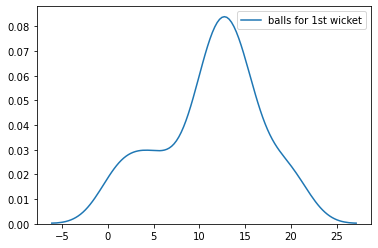

In [552]:
sns.kdeplot(rabada_dismissal["balls for 1st wicket"])

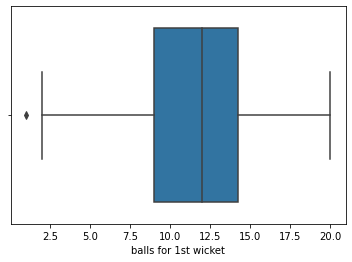

In [553]:
sns.boxplot(rabada_dismissal["balls for 1st wicket"])

In [554]:
print("Average balls taken by Rabada for his first wicket :{}".format(round(rabada_dismissal["balls for 1st wicket"].mean())))

Average balls taken by Rabada for his first wicket :11


Text(0.5, 1.0, 'Balls for 1st wicket')

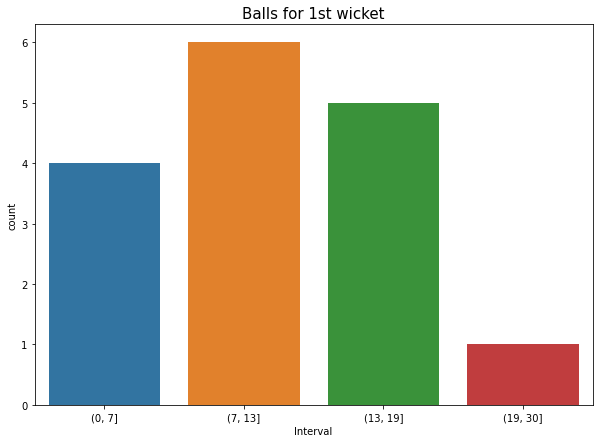

In [555]:
plt.figure(figsize=(10,7))
rabada_dismissal["Interval"] = pd.cut(rabada_dismissal["balls for 1st wicket"],[0,7,13,19,30])
sns.countplot(rabada_dismissal["Interval"])
plt.title("Balls for 1st wicket",fontsize = 15)

From all the above analysis we can predict that Rabada is expected to take 7-13 balls for his first wicket.

## Bowlers with Economy Rate less then 8

- Royal Challengers Bangalore

In [556]:
rcb = RCB_DC[RCB_DC["bowling_team"]=="Royal Challengers Bangalore"]
rcb = rcb[(rcb["season"]==2015) |(rcb["season"]==2016)|(rcb["season"]==2017)| (rcb["season"]==2018) | (rcb["season"]==2019)]
rcb = rcb[(rcb["bye_runs"]==0) & (rcb["legbye_runs"]==0)]
rcb.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
1084,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,0,0,0,NaN,NaN
1085,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,1,2,AP Tare,...,1,0,0,0,0,0,1,1,NaN,NaN
1086,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,0,0,0,NaN,NaN
1087,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,0,0,0,1,0,1,NaN,NaN
1088,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,2,Delhi Capitals,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,0,0,0,NaN,NaN


In [557]:
rcb.season.unique()

array([2017, 2015, 2016, 2018, 2019], dtype=int64)

In [558]:
economy = rcb.groupby(["match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique', 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for RCB Bowlers against DC :")

economy.tail(10)

Bowling stats for RCB Bowlers against DC :


runs given  over  wickets taken
match_id bowler                                            
11311    N Saini                    24     4              2
         P Negi                     27     3              1
         TG Southee                 24     2              1
         YS Chahal                  36     4              0
11337    MP Stoinis                 24     3              0
         N Saini                    44     4              1
         S Dube                      5     1              0
         UT Yadav                   40     4              1
         Washington Sundar          29     4              1
         YS Chahal                  41     4              2

In [559]:
economy["economy rate"] = round((economy['runs given']/economy["over"]),2)

print("Economy Rate of RCB Bowlers while bowling against DC :")

economy.tail(10)

Economy Rate of RCB Bowlers while bowling against DC :


runs given  over  wickets taken  economy rate
match_id bowler                                                          
11311    N Saini                    24     4              2          6.00
         P Negi                     27     3              1          9.00
         TG Southee                 24     2              1         12.00
         YS Chahal                  36     4              0          9.00
11337    MP Stoinis                 24     3              0          8.00
         N Saini                    44     4              1         11.00
         S Dube                      5     1              0          5.00
         UT Yadav                   40     4              1         10.00
         Washington Sundar          29     4              1          7.25
         YS Chahal                  41     4              2         10.25

In [560]:
rcb_boundaries = rcb[(rcb["batsman_runs"]==4)|(rcb["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(rcb_boundaries.groupby(["match_id","bowler"])["batsman_runs"].count())

boundary = boundary_runs.iloc[:,-1]

In [561]:
economy["boundary"] = boundary

economy.boundary.fillna(0,inplace=True)

economy.tail(10)

runs given  over  wickets taken  economy rate  \
match_id bowler                                                             
11311    N Saini                    24     4              2          6.00   
         P Negi                     27     3              1          9.00   
         TG Southee                 24     2              1         12.00   
         YS Chahal                  36     4              0          9.00   
11337    MP Stoinis                 24     3              0          8.00   
         N Saini                    44     4              1         11.00   
         S Dube                      5     1              0          5.00   
         UT Yadav                   40     4              1         10.00   
         Washington Sundar          29     4              1          7.25   
         YS Chahal                  41     4              2         10.25   

                            boundary  
match_id bowler                       
11311    N Saini                 3.0  
         P Negi                  4.0  
         TG Southee              5.0  
         YS Chahal               5.0  
11337    MP Stoinis              2.0  
         N Saini                 8.0  
         S Dube                  0.0  
         UT Yadav                7.0  
         Washington Sundar       3.0  
         YS Chahal               6.0

In [562]:
dot = rcb[rcb["total_runs"]==0]

dot_ball = pd.DataFrame(dot.groupby(["match_id","bowler"])["total_runs"].count())

dot_ball.columns = ["dot balls"]

dots = dot_ball.iloc[:,-1]

In [563]:
economy["dot_ball"] = dots

economy.dot_ball.fillna(0,inplace=True)

economy.tail(15)

runs given  over  wickets taken  economy rate  \
match_id bowler                                                             
7938     TG Southee                 41     4              0         10.25   
         UT Yadav                   28     3              0          9.33   
         YS Chahal                  28     4              2          7.00   
11311    M Ali                      22     4              1          5.50   
         Mohammed Siraj             14     2              1          7.00   
         N Saini                    24     4              2          6.00   
         P Negi                     27     3              1          9.00   
         TG Southee                 24     2              1         12.00   
         YS Chahal                  36     4              0          9.00   
11337    MP Stoinis                 24     3              0          8.00   
         N Saini                    44     4              1         11.00   
         S Dube                      5     1              0          5.00   
         UT Yadav                   40     4              1         10.00   
         Washington Sundar          29     4              1          7.25   
         YS Chahal                  41     4              2         10.25   

                            boundary  dot_ball  
match_id bowler                                 
7938     TG Southee              4.0       7.0  
         UT Yadav                5.0       7.0  
         YS Chahal               3.0       9.0  
11311    M Ali                   2.0      10.0  
         Mohammed Siraj          2.0       4.0  
         N Saini                 3.0      13.0  
         P Negi                  4.0       6.0  
         TG Southee              5.0       4.0  
         YS Chahal               5.0      11.0  
11337    MP Stoinis              2.0       3.0  
         N Saini                 8.0       9.0  
         S Dube                  0.0       1.0  
         UT Yadav                7.0       8.0  
         Washington Sundar       3.0       6.0  
         YS Chahal               6.0      10.0

In [564]:
economy = economy[(economy["over"]>2) & (economy["economy rate"]<8) & (economy["dot_ball"]>8) & (economy["boundary"]<4)]

economy.reset_index(inplace = True)

print("RCB Bowlers with economy rate less then 8: ")

economy

RCB Bowlers with economy rate less then 8: 


,match_id,bowler,runs given,over,wickets taken,economy rate,boundary,dot_ball
0,5,SR Watson,21,4,1,5.25,2.0,12.0
1,5,YS Chahal,19,4,1,4.75,1.0,10.0
2,55,Avesh Khan,23,4,1,5.75,3.0,11.0
3,55,SR Watson,16,4,1,4.00,1.0,11.0
4,543,Iqbal Abdulla,16,4,1,4.00,1.0,12.0
5,543,MA Starc,19,4,3,4.75,3.0,14.0
6,543,VR Aaron,21,4,2,5.25,3.0,13.0
7,587,SR Watson,24,4,2,6.00,3.0,10.0
8,632,SR Watson,27,4,1,6.75,2.0,9.0
9,7912,YS Chahal,22,3,2,7.33,3.0,9.0


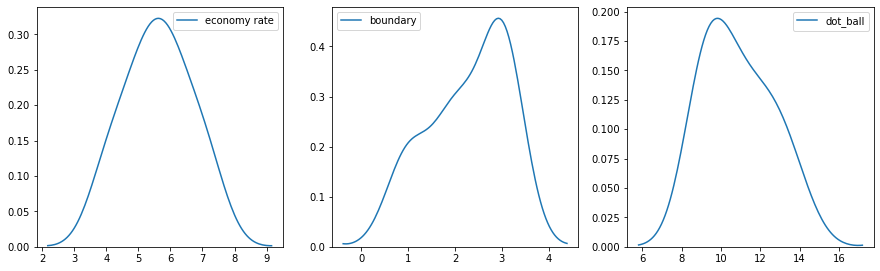

In [565]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.kdeplot(economy["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(economy["dot_ball"])

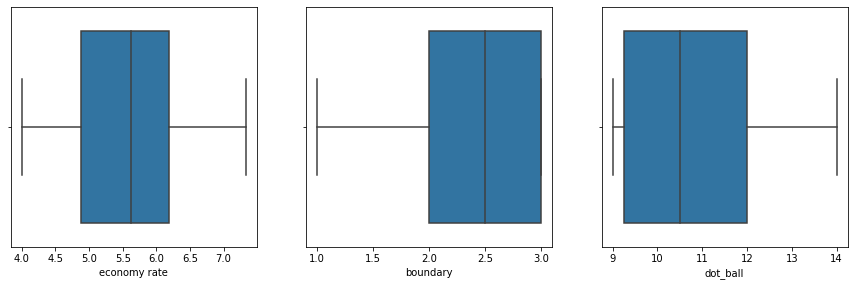

In [566]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.boxplot(economy["boundary"])
plt.subplot(3,3,3)
sns.boxplot(economy["dot_ball"])

In [567]:
economy.describe().iloc[:,4:].T

,count,mean,std,min,25%,50%,75%,max
economy rate,14.0,5.612857,1.032476,4.0,4.875,5.625,6.1875,7.33
boundary,14.0,2.285714,0.825420,1.0,2.000,2.500,3.0000,3.00
dot_ball,14.0,10.857143,1.703261,9.0,9.250,10.500,12.0000,14.00


Text(0, 0.5, 'Count')

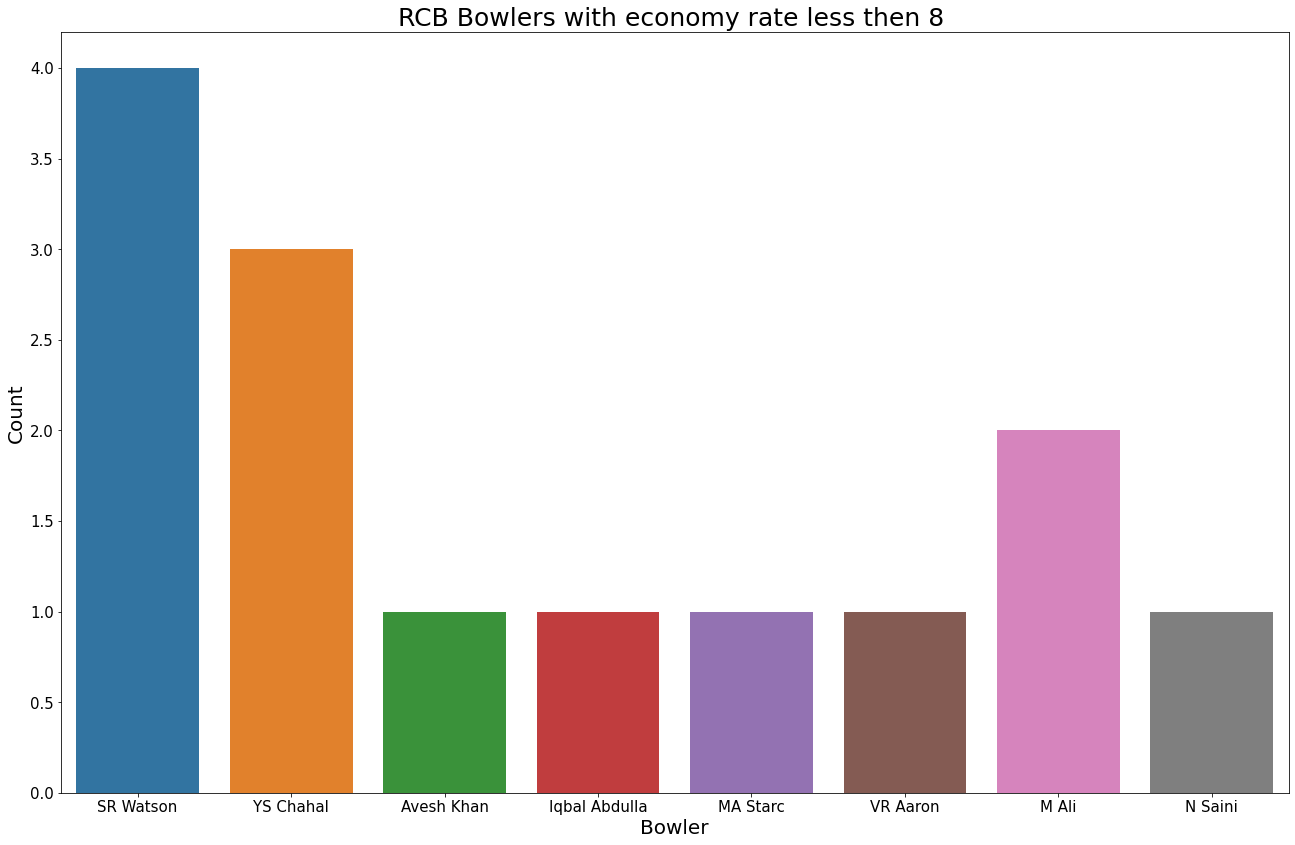

In [568]:
plt.figure(figsize = (22,14))
sns.countplot(economy["bowler"])
plt.title("RCB Bowlers with economy rate less then 8 ",fontsize = 25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Bowler',fontsize=20)
plt.ylabel('Count',fontsize=20)

- Delhi Capitals

In [569]:
dc = RCB_DC[RCB_DC["bowling_team"]=="Delhi Capitals"]
dc = dc[(dc["season"]==2015)|(dc["season"]==2016)|(dc["season"]==2017)|(dc["season"]==2018)|(dc["season"]==2019)]
dc = dc[(dc["bye_runs"]==0)&(dc["legbye_runs"]==0)]
dc.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
960,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,1,1,CH Gayle,...,0,0,0,0,0,1,0,1,NaN,NaN
961,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,1,2,SR Watson,...,0,0,0,0,0,4,0,4,NaN,NaN
962,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,1,3,SR Watson,...,0,0,0,0,0,0,0,0,NaN,NaN
963,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,1,4,SR Watson,...,0,0,0,0,0,4,0,4,NaN,NaN
964,Royal Challengers Bangalore,bat,0,Royal Challengers Bangalore,1,Royal Challengers Bangalore,Delhi Capitals,1,5,SR Watson,...,0,0,0,0,0,0,0,0,NaN,NaN


In [570]:
dc.season.unique()

array([2017, 2015, 2016, 2018, 2019], dtype=int64)

In [571]:
economy = dc.groupby(["match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique', 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for DC Bowlers against RCB :")

economy.tail(10)

Bowling stats for DC Bowlers against RCB :


runs given  over  wickets taken
match_id bowler                                       
11311    CH Morris             28     4              2
         I Sharma              31     4              0
         K Rabada              21     4              4
         S Lamichhane          46     4              1
11337    A Mishra              29     4              2
         AR Patel              26     4              1
         I Sharma              40     4              1
         K Rabada              31     4              2
         S Lamichhane          36     3              0
         S Rutherford           6     1              1

In [572]:
economy["economy rate"] = round((economy['runs given']/economy["over"]),2)

print("Economy Rate of DC Bowlers while bowling against RCB :")

economy.tail(10)

Economy Rate of DC Bowlers while bowling against RCB :


runs given  over  wickets taken  economy rate
match_id bowler                                                     
11311    CH Morris             28     4              2          7.00
         I Sharma              31     4              0          7.75
         K Rabada              21     4              4          5.25
         S Lamichhane          46     4              1         11.50
11337    A Mishra              29     4              2          7.25
         AR Patel              26     4              1          6.50
         I Sharma              40     4              1         10.00
         K Rabada              31     4              2          7.75
         S Lamichhane          36     3              0         12.00
         S Rutherford           6     1              1          6.00

In [573]:
dc_boundaries = dc[(dc["batsman_runs"]==4)|(dc["batsman_runs"]==6)]

boundary_runs = pd.DataFrame(dc_boundaries.groupby(["match_id","bowler"])["batsman_runs"].count())

boundary = boundary_runs.iloc[:,-1]

In [574]:
economy["boundary"] = boundary

economy.boundary.fillna(0,inplace=True)

economy.tail(10)

runs given  over  wickets taken  economy rate  boundary
match_id bowler                                                               
11311    CH Morris             28     4              2          7.00       3.0
         I Sharma              31     4              0          7.75       4.0
         K Rabada              21     4              4          5.25       1.0
         S Lamichhane          46     4              1         11.50       6.0
11337    A Mishra              29     4              2          7.25       2.0
         AR Patel              26     4              1          6.50       2.0
         I Sharma              40     4              1         10.00       7.0
         K Rabada              31     4              2          7.75       4.0
         S Lamichhane          36     3              0         12.00       5.0
         S Rutherford           6     1              1          6.00       0.0

In [575]:
dot = dc[dc["total_runs"]==0]

dot_ball = pd.DataFrame(dot.groupby(["match_id","bowler"])["total_runs"].count())

dot_ball.columns = ["dot balls"]

dots = dot_ball.iloc[:,-1]

In [576]:
economy["dot_ball"] = dots

economy.dot_ball.fillna(0,inplace=True)

economy.tail(10)

runs given  over  wickets taken  economy rate  \
match_id bowler                                                        
11311    CH Morris             28     4              2          7.00   
         I Sharma              31     4              0          7.75   
         K Rabada              21     4              4          5.25   
         S Lamichhane          46     4              1         11.50   
11337    A Mishra              29     4              2          7.25   
         AR Patel              26     4              1          6.50   
         I Sharma              40     4              1         10.00   
         K Rabada              31     4              2          7.75   
         S Lamichhane          36     3              0         12.00   
         S Rutherford           6     1              1          6.00   

                       boundary  dot_ball  
match_id bowler                            
11311    CH Morris          3.0        10  
         I Sharma           4.0        11  
         K Rabada           1.0         9  
         S Lamichhane       6.0         4  
11337    A Mishra           2.0         8  
         AR Patel           2.0         8  
         I Sharma           7.0         8  
         K Rabada           4.0         8  
         S Lamichhane       5.0         1  
         S Rutherford       0.0         1

In [577]:
economy = economy[(economy["over"]>2) & (economy["economy rate"]<8) & (economy["dot_ball"]>8) & (economy["boundary"]<4)]

economy.reset_index(inplace = True)

print("DC Bowlers with economy rate less then 8: ")

economy

DC Bowlers with economy rate less then 8: 


,match_id,bowler,runs given,over,wickets taken,economy rate,boundary,dot_ball
0,5,S Nadeem,12,4,1,3.00,0.0,12
1,55,PJ Cummins,19,4,2,4.75,1.0,9
2,7938,S Lamichhane,25,4,1,6.25,3.0,9
3,11311,CH Morris,28,4,2,7.00,3.0,10
4,11311,K Rabada,21,4,4,5.25,1.0,9


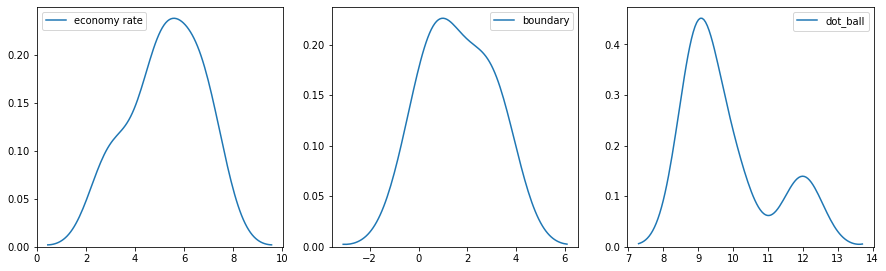

In [578]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.kdeplot(economy["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(economy["dot_ball"])

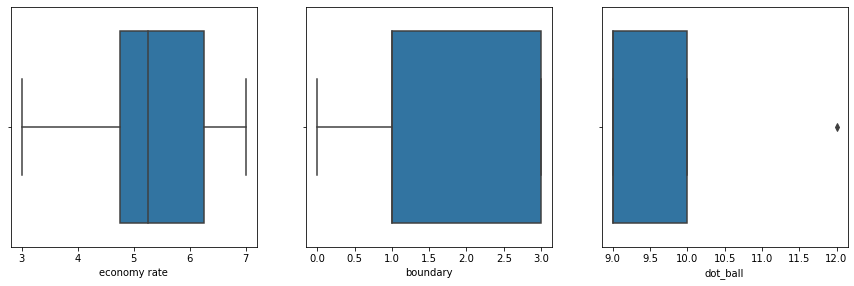

In [579]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.boxplot(economy["boundary"])
plt.subplot(3,3,3)
sns.boxplot(economy["dot_ball"])

In [580]:
economy.describe().iloc[:,4:].T

,count,mean,std,min,25%,50%,75%,max
economy rate,5.0,5.25,1.530931,3.0,4.75,5.25,6.25,7.0
boundary,5.0,1.60,1.341641,0.0,1.00,1.00,3.00,3.0
dot_ball,5.0,9.80,1.303840,9.0,9.00,9.00,10.00,12.0


Text(0, 0.5, 'Count')

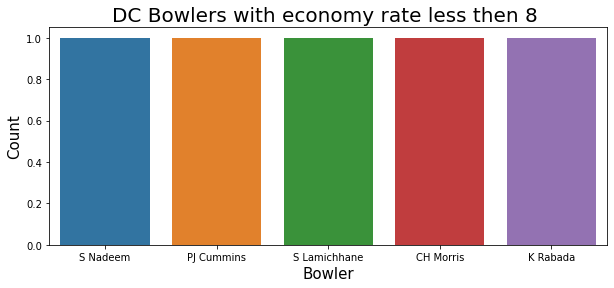

In [581]:
plt.figure(figsize = (10,4))
sns.countplot(economy["bowler"])
plt.title("DC Bowlers with economy rate less then 8 ",fontsize = 20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Bowler',fontsize=15)
plt.ylabel('Count',fontsize=15)

From all the above analysis we can predict that 3+ bowlers from both the teams are expected to have economy rate less then 8